In [2]:
# ! pip3 install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import json
from gcd_data_manipulation import prepare_data

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


job_id = 3418339

with open('columns_selection.json') as f:
    columns_selection = json.load(f)

columns_to_consider = columns_selection['GWT_efficiency_1']

data = prepare_data(f'../data/task-usage_job-ID-{job_id}_total.csv', columns_to_consider, targets=[0], sliding_window=1, aggr_type='mean')

df = pd.DataFrame(data, columns=columns_to_consider)

In [32]:
df['Efficiency t+1'] = df.loc[:, 'Efficiency'].shift(-1)
df.rename(columns={'Efficiency': 'Efficiency t'}, inplace=True)
df

,end time,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,total page cache,maximum memory usage,disk I/O time,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,CPU ratio usage,memory ratio usage,disk ratio usage,Efficiency t,Efficiency t+1
0,0.259497,0.312537,0.978199,0.045668,0.054525,0.309223,0.048871,0.139262,0.116508,0.090038,0.137673,0.125828,0.259497,0.312537,0.139262,0.218765,0.258573,0.234561
1,0.308886,0.345073,0.975182,0.098684,0.112844,0.441843,0.151025,0.111500,0.230187,0.304241,0.180647,0.156714,0.308886,0.345073,0.111500,0.258573,0.234561,0.231326
2,0.291158,0.319189,0.976370,0.085391,0.094273,0.335547,0.024222,0.111378,0.113820,0.031128,0.139938,0.120782,0.291158,0.319188,0.111378,0.234561,0.231326,0.225086
3,0.288689,0.315984,0.978743,0.079442,0.088212,0.296825,0.019778,0.111403,0.095332,0.026068,0.135900,0.117526,0.288689,0.315984,0.111403,0.231326,0.225086,0.237232
4,0.282888,0.315074,0.977556,0.079670,0.088465,0.296376,0.017813,0.111524,0.097396,0.022604,0.145441,0.145949,0.282888,0.315074,0.111524,0.225086,0.237232,0.237227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,0.336792,0.294832,0.980028,0.026995,0.022360,0.278361,0.048871,0.171257,0.158170,0.090038,0.128709,0.112951,0.336792,0.294832,0.171257,0.318912,0.311829,0.307078
8348,0.330105,0.294395,0.980028,0.029544,0.024962,0.277533,0.048871,0.171378,0.142326,0.090038,0.130230,0.113220,0.330105,0.294394,0.171378,0.311829,0.307078,0.290262
8349,0.325531,0.295269,0.980028,0.024292,0.019582,0.277947,0.048871,0.171257,0.150106,0.090038,0.122266,0.108612,0.325531,0.295269,0.171257,0.307078,0.290262,0.295426
8350,0.309646,0.294395,0.980028,0.024109,0.019390,0.277533,0.048871,0.171512,0.118325,0.090038,0.108465,0.098929,0.309646,0.294394,0.171512,0.290262,0.295426,0.305339


<AxesSubplot:>

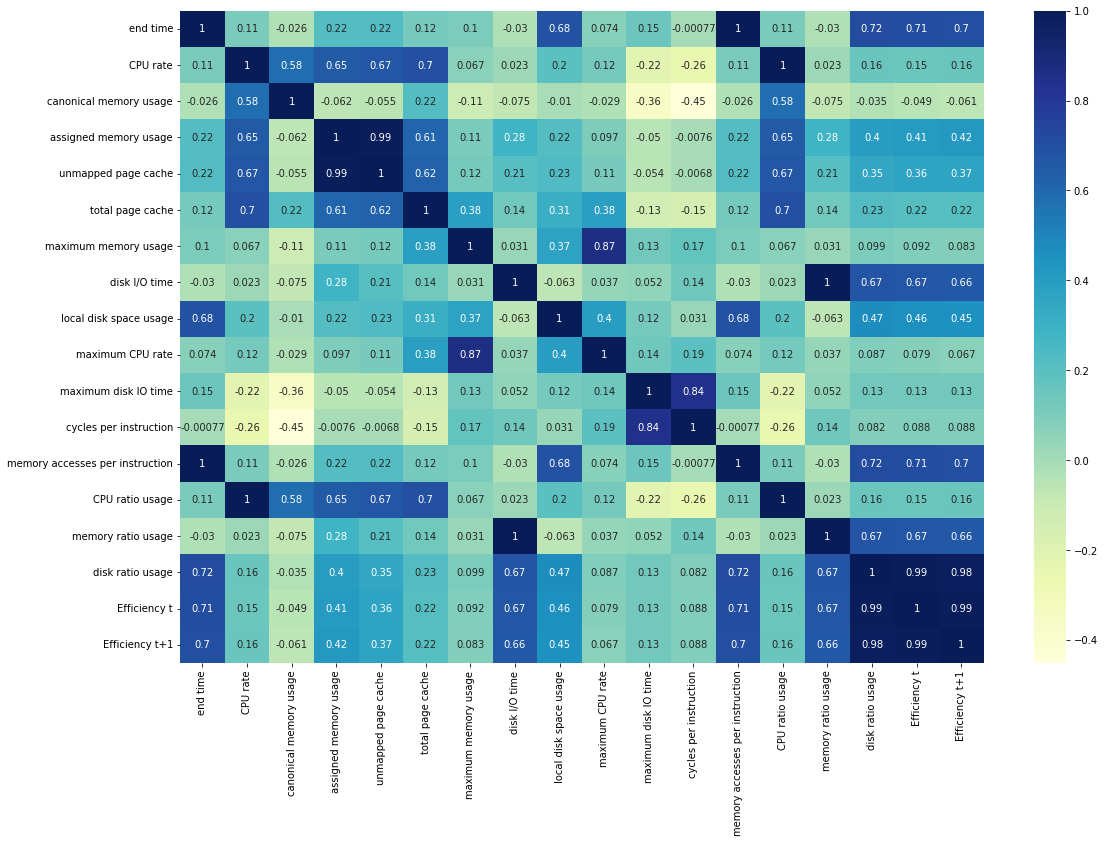

In [33]:
fig = plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [35]:
fig.savefig('corr_matrix.png', transparent=True)

<AxesSubplot:xlabel='Efficiency t', ylabel='Density'>

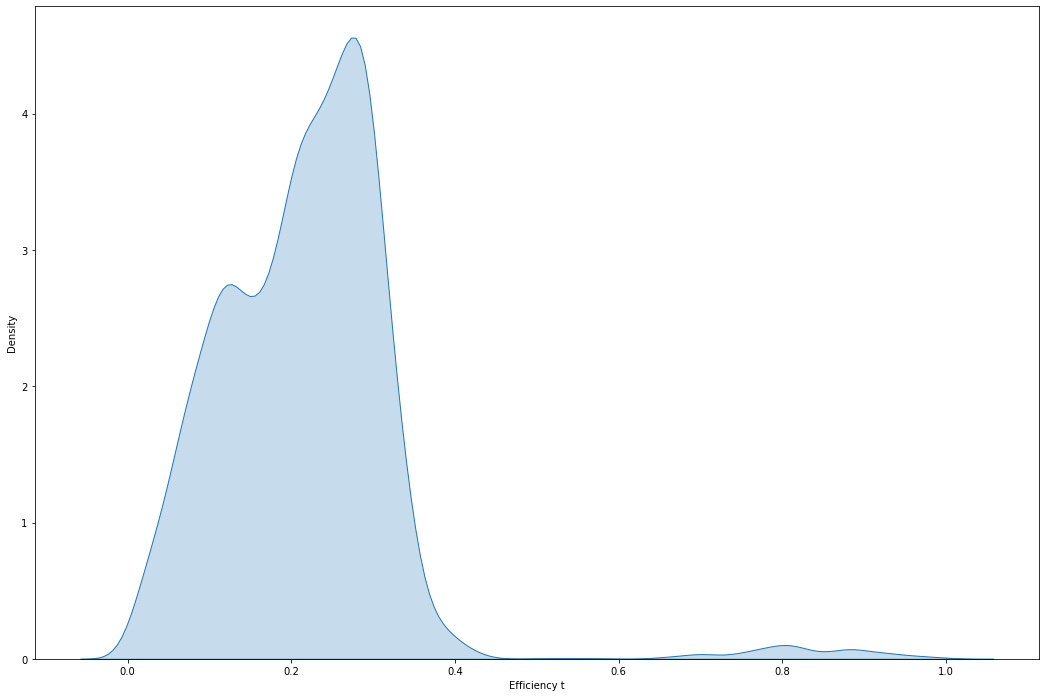

In [38]:
fig2 = plt.figure(figsize=(18, 12))
sns.kdeplot(df['Efficiency t'], fill=True)